In [64]:
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [85]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Users/Acer/anaconda3/Library/bin/graphviz/'

In [65]:
df = read_csv("E:/Leeds University/Dissertation/desdata.csv", delim_whitespace=False)

In [66]:
df.columns

Index(['Compound', 'G_sol', 'DeltaG_sol', 'volume', 'sol_dip', 'O_charges',
       'C_charges', 'Most_neg', 'Most_pos', 'Het_charges', 'MW', 'SASA',
       'LogS', 'Lsolu_Hsolv', 'Lsolv_Hsolu'],
      dtype='object')

In [67]:
df = df.loc[:, df.columns != 'Compound']

In [68]:
#Split into features and target (Price)
X = df.drop('LogS', axis = 1)
y = df['LogS']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [70]:
ann_xtrain = read_csv("E:/Leeds University/Dissertation/ann_xtrain.csv", delim_whitespace=False)
ann_xtest = read_csv("E:/Leeds University/Dissertation/ann_xtest.csv", delim_whitespace=False)
ann_ytrain = read_csv("E:/Leeds University/Dissertation/ann_ytrain.csv", delim_whitespace=False)
ann_ytest = read_csv("E:/Leeds University/Dissertation/ann_ytest.csv", delim_whitespace=False)

In [71]:
#Scale data, otherwise model will fail.
#Standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(ann_xtrain)

StandardScaler()

In [72]:
X_train_scaled = scaler.transform(ann_xtrain)
X_test_scaled = scaler.transform(ann_xtest)

In [73]:
ann_ytest

,LogS
0,-4.100
1,-4.230
2,-5.510
3,-4.001
4,-3.494
...,...
263,-3.730
264,-4.360
265,-3.813
266,-5.680


In [90]:
# define the model
#Experiment with deeper and wider networks
model = Sequential()
model.add(Dense(128, input_dim=13, activation='relu'))
model.add(Dense(64, activation='relu'))
#Output layer
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               1792      
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 1)                 65        
                                                                 
Total params: 10,113
Trainable params: 10,113
Non-trainable params: 0
_________________________________________________________________


In [92]:
from ann_visualizer.visualize import ann_viz;

ann_viz(model, title="Neural Network Plot")

In [77]:
history = model.fit(X_train_scaled, ann_ytrain, validation_split=0.2, epochs =100)

Epoch 1/100
16/16 [==============================] - 9s 37ms/step - loss: 11.8371 - mae: 2.7675 - val_loss: 9.0174 - val_mae: 2.2661
Epoch 2/100
16/16 [==============================] - 0s 5ms/step - loss: 6.0318 - mae: 1.9651 - val_loss: 4.3532 - val_mae: 1.6745
Epoch 3/100
16/16 [==============================] - 0s 5ms/step - loss: 2.8667 - mae: 1.3736 - val_loss: 2.1851 - val_mae: 1.1366
Epoch 4/100
16/16 [==============================] - 0s 10ms/step - loss: 1.9688 - mae: 1.0848 - val_loss: 1.9319 - val_mae: 1.0267
Epoch 5/100
16/16 [==============================] - 0s 4ms/step - loss: 1.7259 - mae: 1.0035 - val_loss: 1.7631 - val_mae: 1.0051
Epoch 6/100
16/16 [==============================] - 0s 5ms/step - loss: 1.5409 - mae: 0.9379 - val_loss: 1.6572 - val_mae: 0.9731
Epoch 7/100
16/16 [==============================] - 0s 4ms/step - loss: 1.4433 - mae: 0.9019 - val_loss: 1.6243 - val_mae: 0.9618
Epoch 8/100
16/16 [==============================] - 0s 5ms/step - loss: 1.3657 

16/16 [==============================] - 0s 3ms/step - loss: 0.4235 - mae: 0.4790 - val_loss: 1.1838 - val_mae: 0.8051
Epoch 64/100
16/16 [==============================] - 0s 3ms/step - loss: 0.4214 - mae: 0.4737 - val_loss: 1.2175 - val_mae: 0.8036
Epoch 65/100
16/16 [==============================] - 0s 3ms/step - loss: 0.4035 - mae: 0.4787 - val_loss: 1.1479 - val_mae: 0.7939
Epoch 66/100
16/16 [==============================] - 0s 3ms/step - loss: 0.3913 - mae: 0.4607 - val_loss: 1.1373 - val_mae: 0.7856
Epoch 67/100
16/16 [==============================] - 0s 3ms/step - loss: 0.3875 - mae: 0.4586 - val_loss: 1.1487 - val_mae: 0.7875
Epoch 68/100
16/16 [==============================] - 0s 3ms/step - loss: 0.3804 - mae: 0.4502 - val_loss: 1.2080 - val_mae: 0.8089
Epoch 69/100
16/16 [==============================] - 0s 3ms/step - loss: 0.3651 - mae: 0.4451 - val_loss: 1.1392 - val_mae: 0.7855
Epoch 70/100
16/16 [==============================] - 0s 3ms/step - loss: 0.3722 - mae: 0

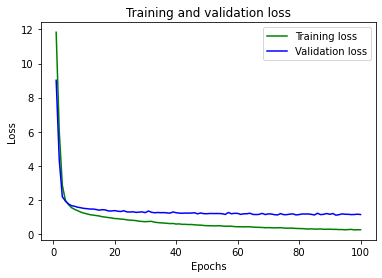

In [118]:
from matplotlib import pyplot as plt
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
resolution_value=1200
plt.savefig('E:/Leeds University/Dissertation/ann_model.png',format='png',dpi=resolution_value)
plt.show()

In [38]:
#Predict on test data
predictions = model.predict(X_test_scaled[:])
print("Predicted values are: ", predictions)
print("Real values are: ", ann_ytest[:])

Predicted values are:  [ -2.92077905  -3.66828076  -5.23971217  -3.15884715  -3.16491307
  -4.4466909   -2.82857242  -2.34594697  -3.76307919  -4.07854425
  -3.01488488  -1.60055565  -0.69878049  -0.29589063  -2.65751968
  -4.43457486  -2.431158    -2.32770961   0.17601953  -0.3419728
  -2.91333984  -6.11093524  -6.78434512  -3.84512786  -0.68547613
  -4.84210637  -3.40458779  -1.98405517  -6.77506748  -3.03588964
  -2.14526755  -2.98588001  -3.82050049  -0.56556705  -0.44415621
  -0.54328304  -3.94794057  -5.25062457  -2.76682529  -3.32023714
  -2.86338241  -2.26325104  -1.81823806  -8.49030548  -2.78033
  -3.5495207   -3.34538857  -1.94574139  -2.80708241  -3.15653275
  -4.984813    -2.34482462 -10.9845985   -0.5837452   -3.35496628
   0.08622565   0.7298612   -4.85439484  -8.08068238  -4.60447619
  -0.19439875  -3.61543612  -1.48922091  -4.94442465   0.11840123
  -7.368361    -3.03242156  -0.57564734  -5.57898177  -0.79874906
  -5.66097939  -6.61929693  -8.02293156  -4.21743126  -2.

In [39]:
predictions

array([ -2.92077905,  -3.66828076,  -5.23971217,  -3.15884715,
        -3.16491307,  -4.4466909 ,  -2.82857242,  -2.34594697,
        -3.76307919,  -4.07854425,  -3.01488488,  -1.60055565,
        -0.69878049,  -0.29589063,  -2.65751968,  -4.43457486,
        -2.431158  ,  -2.32770961,   0.17601953,  -0.3419728 ,
        -2.91333984,  -6.11093524,  -6.78434512,  -3.84512786,
        -0.68547613,  -4.84210637,  -3.40458779,  -1.98405517,
        -6.77506748,  -3.03588964,  -2.14526755,  -2.98588001,
        -3.82050049,  -0.56556705,  -0.44415621,  -0.54328304,
        -3.94794057,  -5.25062457,  -2.76682529,  -3.32023714,
        -2.86338241,  -2.26325104,  -1.81823806,  -8.49030548,
        -2.78033   ,  -3.5495207 ,  -3.34538857,  -1.94574139,
        -2.80708241,  -3.15653275,  -4.984813  ,  -2.34482462,
       -10.9845985 ,  -0.5837452 ,  -3.35496628,   0.08622565,
         0.7298612 ,  -4.85439484,  -8.08068238,  -4.60447619,
        -0.19439875,  -3.61543612,  -1.48922091,  -4.94

In [41]:
ann_prediction = pd.DataFrame(predictions, columns=['LogS']).to_csv('E:/Leeds University/Dissertation/ann_prediction.csv')

In [43]:
#Comparison with other models..
#Neural network - from the current code
mse_neural, mae_neural = model.evaluate(X_test_scaled, ann_ytest)
print('Root Mean squared error from neural net: ', mse_neural)
print('Mean absolute error from neural net: ', mae_neural)

AttributeError: 'RandomForestRegressor' object has no attribute 'evaluate'

In [60]:
import numpy as np
import shap

In [61]:
import tensorflow as tf

In [33]:
######################################################################
#Linear regression
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

### Linear regression
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train_scaled, ann_ytrain)
y_pred_lr = lr_model.predict(X_test_scaled)
mse_lr = mean_squared_error(ann_ytest, y_pred_lr)
mae_lr = mean_absolute_error(ann_ytest, y_pred_lr)
print('Mean squared error from linear regression: ', mse_lr)
print('Mean absolute error from linear regression: ', mae_lr)

Mean squared error from linear regression:  1.2973471996671648
Mean absolute error from linear regression:  0.8678918853223664


In [34]:
############################################################
### Decision tree
tree = DecisionTreeRegressor()
tree.fit(X_train_scaled, ann_ytrain)
y_pred_tree = tree.predict(X_test_scaled)
mse_dt = mean_squared_error(ann_ytest, y_pred_tree)
mae_dt = mean_absolute_error(ann_ytest, y_pred_tree)
print('Mean squared error using decision tree: ', mse_dt)
print('Mean absolute error using decision tree: ', mae_dt)

Mean squared error using decision tree:  1.6063857694574628
Mean absolute error using decision tree:  0.9500794552238807


In [35]:
##############################################
#Random forest.
#Increase number of tress and see the effect
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 800, random_state=30)
model.fit(X_train_scaled, ann_ytrain)

y_pred_RF = model.predict(X_test_scaled)

mse_RF = mean_squared_error(ann_ytest, y_pred_RF)
mae_RF = mean_absolute_error(ann_ytest, y_pred_RF)
print('Mean squared error using Random Forest: ', mse_RF)
print('Mean absolute error Using Random Forest: ', mae_RF)

<ipython-input-35-0acdf5c6bcfb>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_scaled, ann_ytrain)


Mean squared error using Random Forest:  0.7786696068137872
Mean absolute error Using Random Forest:  0.6948609628871277


In [36]:
#Feature ranking...
import pandas as pd
feature_list = list(X.columns)
feature_imp = pd.Series(model.feature_importances_, index=feature_list).sort_values(ascending=False)
print(feature_imp)

volume         0.394062
Most_neg       0.205314
MW             0.077157
SASA           0.060350
Most_pos       0.055639
Het_charges    0.042508
G_sol          0.029816
C_charges      0.029388
O_charges      0.029048
Lsolu_Hsolv    0.026980
sol_dip        0.022317
Lsolv_Hsolu    0.015897
DeltaG_sol     0.011524
dtype: float64
